In [6]:
## Import libraries
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy

source = "../source"
sys.path.append(source)

from compilation import Compiler, ScalarTracker, ActivationTracker
import publication
import simulate

save = False

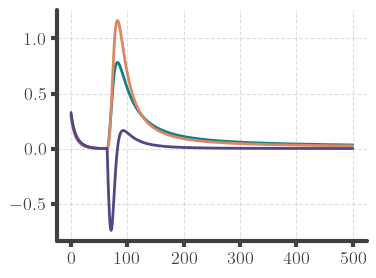

In [196]:
fig, ax = plt.subplots(figsize=(4, 3))

dx2 = 1
dy2 = 0.01

h0 = 0.3
y0 = 0.3
theta = 0.5  # between -1 and 1
w0 = y0 + theta * np.sqrt(y0 * dy2)

eta_h = 0.1
eta_y = eta_h

epochs = 500

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)

publication.set_color_mixed()
plt.plot(t, z[0])
plt.plot(t, z[1])
plt.plot(t, z[2])
# plt.ylim(0, 0.01)
publication.plt_show()

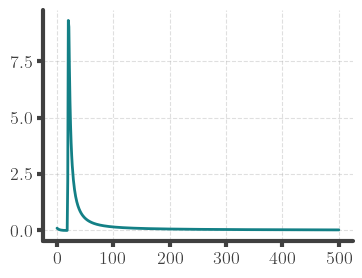

In [265]:
fig, ax = plt.subplots(figsize=(4, 3))

dx2 = 1
dy2 = 0.01

h0 = 0.1
y0 = 0.2
theta = 0.9  # between -1 and 1
w0 = y0 + theta * np.sqrt(y0 * dy2)

eta_h = 0.1
eta_y = eta_h

epochs = 500

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)

publication.set_color_mixed()
plt.plot(t, z[0])
# plt.plot(t, z[1])
# plt.plot(t, z[2])s
# plt.ylim(0, 0.01)
publication.plt_show()

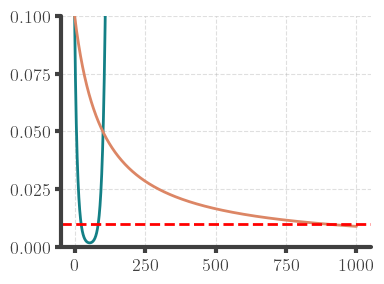

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))


h0 = 0.1
y0 = h0**2
theta = 0.99  # between -1 and 1

epochs = 1000

eta_h, eta_y = 0.1, 0.1


dx2 = 1
dy2 = 1

w0 = y0 + theta * np.sqrt(y0 * dy2)

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)
publication.set_color_mixed()
plt.plot(t, z[0])

dy2 = 0
w0 = y0 + theta * np.sqrt(y0 * dy2)

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)
publication.set_color_mixed()
plt.plot(t, z[0])
plt.ylim(0, 0.1)
plt.axhline(0.01, color="r", linestyle="--")
publication.plt_show()